### **First we rain a CNN on the Fashion-MNIST Dataset usng NO Regularisation Methods**


In [68]:
import torch
import PIL
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

print('GPU available : {}'.format(torch.cuda.is_available()))
device = 'cuda' if torch.cuda.is_available() else 'cpu'

GPU available : True


In [69]:
transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))]) 

# - (0.5,) means subtract the mean value 0.5 from each channel (in this case, there's only one channel since it's grayscale).
# - (0.5,) means divide each channel by the standard deviation of 0.5.  """


In [70]:
trainset = torchvision.datasets.FashionMNIST(root = './data', 
                                             train=True,
                                             download=True,
                                             transform = transform)
testset = torchvision.datasets.FashionMNIST(root = './data', 
                                             train= False,
                                             download=True,
                                             transform = transform)

In [71]:
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True )
testLoader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True )
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

## **visulising our Data**

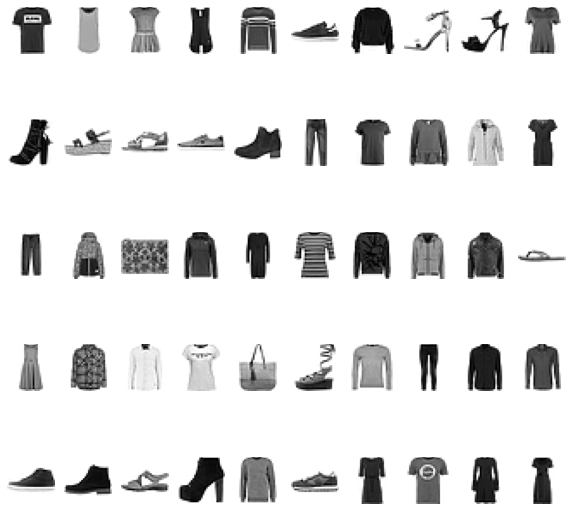

In [72]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))
num_of_images = 50

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(trainset.data[index], cmap='gray_r')



In [ ]:
import numpy as np

def imshow(img):
    img = img * 0.5 + 0.5    # unnormalize (bcz the formul of normalization is  (image - mean)/std and this was our transformation  transforms.Normalize((0.5, ) #std , (0.5, ) #mean ) 
    npimg = img.np()
    plt.imshow(np.transpose(npimg, (1,2,0))) #In PyTorch, image tensors are typically in the shape: (c,h,w) but expected in matplotlib is (h,w,c) so (c,h,w) => (h,w,c)
    plt.show()

dataiter = iter(trainLoader)
images, labels = dataiter.next()   

imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [73]:
class FMnistclassifier(nn.Module):
    def __init__(self):
        super(FMnistclassifier, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3)
        self.conv2 = nn.Conv2d(32,64,3)
        self.maxpool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(64 * 12 * 12 , 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x= self.maxpool(x)
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
net = FMnistclassifier()
net.to(device)
        

FMnistclassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [74]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [76]:
epochs = 15

epoch_log = []
accuracy_log = []
loss_log = []

for epoch in range(epochs):
    print(f'starting epoch : {epoch +1}...')

    running_loss = 0.0

    for i , data in enumerate(trainLoader, 0):

        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)


        optimizer.zero_grad()

        output = net(inputs)

        loss = criterion(output, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()

        if i % 100 == 99:

            correct = 0
            total = 0
            
            with torch.no_grad():

                for data in testLoader:

                    images , labels = data

                    images = images.to(device)
                    labels = labels.to(device)

                    output = net(images)

                    _, predict = torch.max(output.data, 1)

                    correct += (predict == labels).sum().item()
                    total += labels.size(0)

                accuracy = (correct/total) * 100
                epoch_num = epoch + 1
                actual_loss = running_loss / 100 # represents the average loss over 100 mini-batches
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0



    epoch_log.append(epoch)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')        


starting epoch : 1...
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.880, Test Accuracy = 70.570%
Epoch: 1, Mini-Batches Completed: 200, Loss: 0.704, Test Accuracy = 73.390%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.709, Test Accuracy = 75.140%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.622, Test Accuracy = 74.630%
Epoch: 1, Mini-Batches Completed: 500, Loss: 0.613, Test Accuracy = 72.230%
Epoch: 1, Mini-Batches Completed: 600, Loss: 0.594, Test Accuracy = 77.620%
Epoch: 1, Mini-Batches Completed: 700, Loss: 0.549, Test Accuracy = 75.500%
Epoch: 1, Mini-Batches Completed: 800, Loss: 0.559, Test Accuracy = 79.390%
Epoch: 1, Mini-Batches Completed: 900, Loss: 0.559, Test Accuracy = 78.420%
Epoch: 1, Mini-Batches Completed: 1000, Loss: 0.526, Test Accuracy = 80.400%
Epoch: 1, Mini-Batches Completed: 1100, Loss: 0.520, Test Accuracy = 79.030%
Epoch: 1, Mini-Batches Completed: 1200, Loss: 0.486, Test Accuracy = 81.010%
Epoch: 1, Mini-Batches Completed: 1300, Loss: 0.509, Test Accur

# **Accuracy of The Model**

In [80]:
correct = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        images , labels = data

        images = images.to(device)
        labels = labels.to(device)

        outputs = net(images)

        _, predict = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predict == labels).sum().item()

accuracy = (correct/total) * 100
print(f'Accuracy of the network on the 10000 test images : {accuracy}')      

Accuracy of the network on the 10000 test images : 90.97


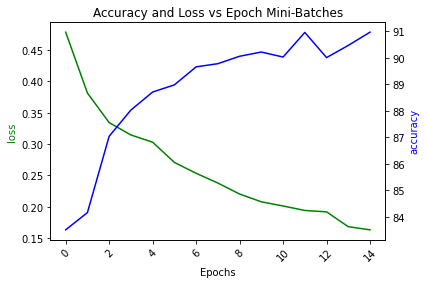

In [86]:
fig, ax1 = plt.subplots() ## To create a plot with secondary y-axis we need to create a subplot

plt.title('Accuracy and Loss vs Epoch Mini-Batches')
plt.xticks(rotation= 45)

ax2 = ax1.twinx() # We use twinx to create a plot a secondary y axis

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel("Epochs")
ax1.set_ylabel('loss', color='g')
ax2.set_ylabel('accuracy', color='b')


plt.show()


#### **Saving Our Model's Weights**

In [88]:
PATH = './fashion_mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)